In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [97]:
cwd=os.getcwd()
print(cwd)
print("Training-Left:"+str(len(os.listdir(os.path.join(cwd,'figtmp/training/Left')))))
print("Training-Right:"+str(len(os.listdir(os.path.join(cwd,'figtmp/training/Right')))))
print("Training-Straight:"+str(len(os.listdir(os.path.join(cwd,'figtmp/training/Straight')))))
print("Testing-Left:"+str(len(os.listdir(os.path.join(cwd,'figtmp/testing/Left')))))
print("Testing-Right:"+str(len(os.listdir(os.path.join(cwd,'figtmp/testing/Right')))))
print("Testing-Straight:"+str(len(os.listdir(os.path.join(cwd,'figtmp/testing/Straight')))))

/Users/xmxhuihui/Jupyter Notebook/Tensorflow/Self_Driving_Car_Project
Training-Left:23
Training-Right:23
Training-Straight:105
Testing-Left:6
Testing-Right:4
Testing-Straight:17


(139, 349, 4)


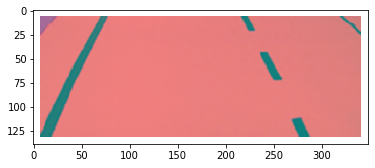

In [98]:
#Sample image and shape
sp0=plt.imread(os.path.join(os.path.join(cwd,'figtmp/training/Straight'),os.listdir(os.path.join(cwd,'figtmp/training/Straight'))[10]))
plt.imshow(sp0)
print(sp0.shape)

In [99]:
TRAINING_DIR=os.path.join(cwd,'figtmp/training/')
VALIDATION_DIR=os.path.join(cwd,'figtmp/testing/')
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(66, 200))
validation_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=5,
                                                              class_mode='categorical',
                                                              target_size=(66, 200))

Found 151 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


In [100]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, (5, 5), strides=(2,2), activation='relu', input_shape=(66, 200, 3)),
    tf.keras.layers.Conv2D(36, (5, 5), strides=(2,2), activation='relu'),
    tf.keras.layers.Conv2D(48, (5, 5), strides=(2,2), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])


In [101]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
dropout_21 (Dropout)         (None, 3, 20, 64)         0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)            

In [108]:
checkpoint_dir=os.path.join(cwd,'training_checkpoints')
#checkpoint = tf.train.Checkpoint(model=model)
#try:
#    checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
#except Exception:
#    pass
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir, verbose=1, save_best_only=True)
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=[checkpoint_callback])
model.save(checkpoint_dir)

Epoch 1/20
15/16 [===========================>..] - ETA: 0s - loss: 0.6245 - acc: 0.7163
Epoch 00001: val_loss improved from inf to 0.80337, saving model to /Users/xmxhuihui/Jupyter Notebook/Tensorflow/Self_Driving_Car_Project/training_checkpoints
INFO:tensorflow:Assets written to: /Users/xmxhuihui/Jupyter Notebook/Tensorflow/Self_Driving_Car_Project/training_checkpoints/assets
16/16 [==============================] - 4s 230ms/step - loss: 0.6406 - acc: 0.7020 - val_loss: 0.8034 - val_acc: 0.6667
Epoch 2/20
15/16 [===========================>..] - ETA: 0s - loss: 0.6646 - acc: 0.7021
Epoch 00002: val_loss did not improve from 0.80337
16/16 [==============================] - 3s 167ms/step - loss: 0.6674 - acc: 0.7020 - val_loss: 1.0379 - val_acc: 0.5185
Epoch 3/20
15/16 [===========================>..] - ETA: 0s - loss: 0.7980 - acc: 0.7021
Epoch 00003: val_loss improved from 0.80337 to 0.77341, saving model to /Users/xmxhuihui/Jupyter Notebook/Tensorflow/Self_Driving_Car_Project/traini

<Figure size 432x288 with 0 Axes>

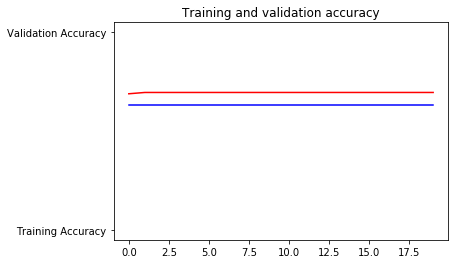

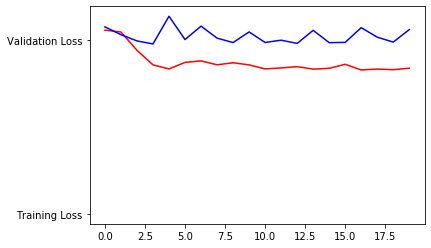

<Figure size 432x288 with 0 Axes>

In [103]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [104]:
#try:
#    os.mkdir(checkpoint_dir)
#except OSError:
#    pass
#checkpoint_prefix=os.path.join(checkpoint_dir, 'ckpt')
#checkpoint.save(file_prefix=checkpoint_prefix)
#tf.saved_model.save(checkpoint,os.path.join(cwd,'saved_model'))

In [105]:
model.evaluate(validation_generator)

6/6 [==============================] - 0s 65ms/step - loss: 1.0634 - acc: 0.6296


[1.0634115835030873, 0.6296296]

In [106]:
#converter = tf.lite.TFLiteConverter.from_saved_model(os.path.join(cwd,'saved_model'))
#tflite_model = converter.convert()